In [1]:
# import required libraries 
import pandas as pd
import numpy as np
from scipy.stats import norm, t,ttest_1samp,ttest_ind,ttest_rel

# Question 1

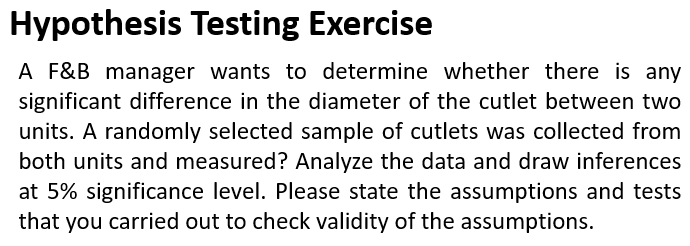

In [2]:
# Load the data set'Cutlets.csv
df = pd.read_csv('Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
# basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [4]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


## We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data

# Step 1
# Formulate the hypothesis
+ **Null Hypothesis:** $\mu_1 (Average diameter of Unit:A) = \mu_2$ (Average diameter of Unit:B)
+ **Alternative Hypthosis:** $\mu_1(Average diameter of Unit:A) \neq \mu_2(Average diameter of Unit:B)$

# The significance level is at 0.05%
# Here we are conducting two tailed test so the significance level = 0.05/2 = 0.025.

In [7]:
# Conduct the 2 tailed test of independent sample and find the p value
statistic , p_value = ttest_ind(df['Unit A'],df['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


# Here p value is greater than significance level of 0.025 , hence we failed to reject null hypothesis
# And there is no significance difference between the two samples

# Question 2

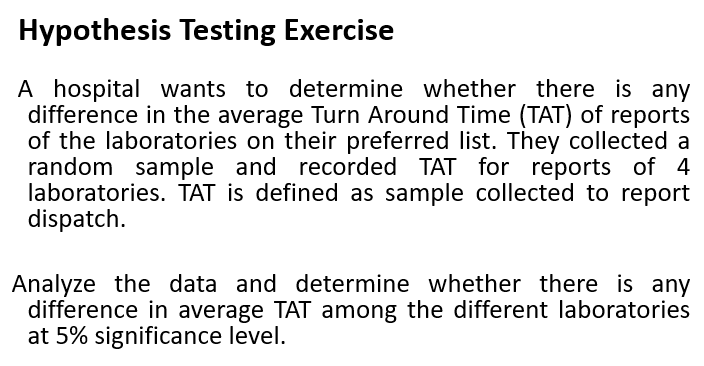

# Load the data set

In [9]:
df_lab = pd.read_csv('LabTAT.csv')
df_lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [10]:
# basic info about the data
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [11]:
# There are no null values in the data

In [13]:
df_lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


# We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

# Step : 1
# Formulate the hypothesis
# # 𝐻0:Average Turn around time of all laboratories are equal ($\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$)
# # Ha: Average turn around time of Atleast one laborotries are not equal 

# Step : 2
# Import the required libraries and Conduct the test

In [15]:
from scipy.stats import f_oneway

In [16]:
test_statistic , p_value = f_oneway(df_lab.iloc[:,0],df_lab.iloc[:,1],df_lab.iloc[:,2],df_lab.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


# Here significance level given is 0.05%

# From the above p value is less than the sinificance level of 0.05% 
# We  dont have sufficient evidence to accept the null hypothesis , and we will accept the alternative hypothesis 
# That is average turn around time of atleast one laboratories are not equal

# 

# 

# Question : 3

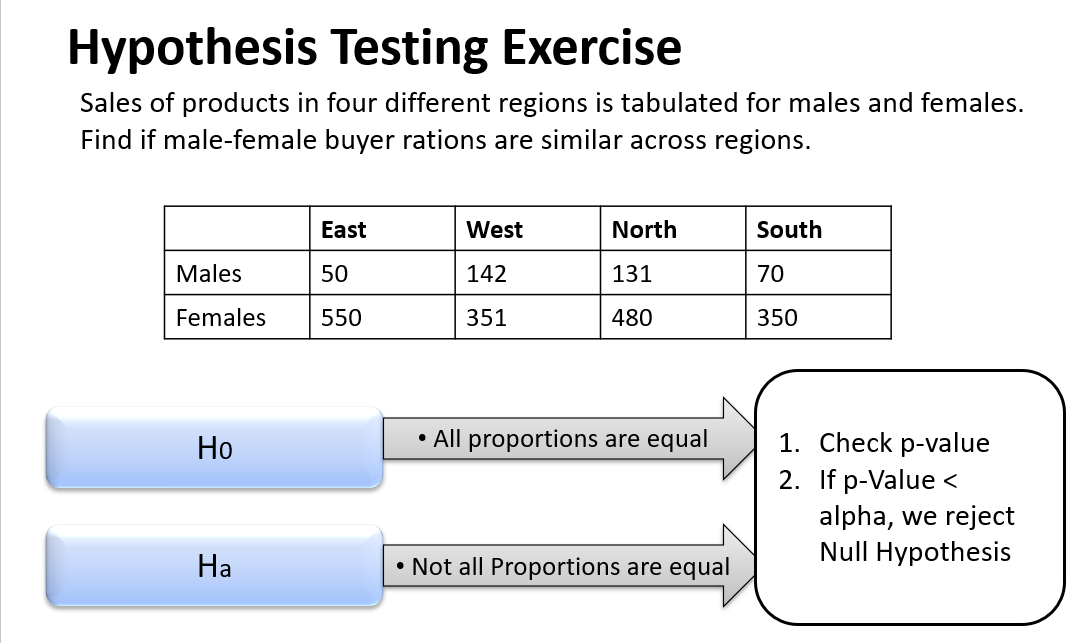

In [17]:
# Load the data set BuyerRatio.csv
df_buy = pd.read_csv('BuyerRatio.csv')
df_buy.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


## We are going to conduct a Test of Independence using Chi-Square  test with Contingency table

# Step : 1
# formulate the hypothesis
# Ho: (Null hypothesis) : No association or dependency between the gender based buyer rations across regions

# Ha: (Alternate hypothesis): There is  association or dependency between the gender based buyer rations across regions

In [18]:
# Import the required libraries
from scipy.stats import chisquare,chi2_contingency

In [23]:
# Create a tab;e with the above values
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [24]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [25]:
# frame the observed and expected values from the above results
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 
                     442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [27]:
# Calculate the p value
statistics, p_value = chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


### Compare p_value with '$\alpha$ '(Significane Level)

# Here significane level = 0.05% 
# Here p value is greater than significance level and we failed to reject null hypothesis
# That is No association or dependency between the gender based buyer rations across regions

#

# Question : 4

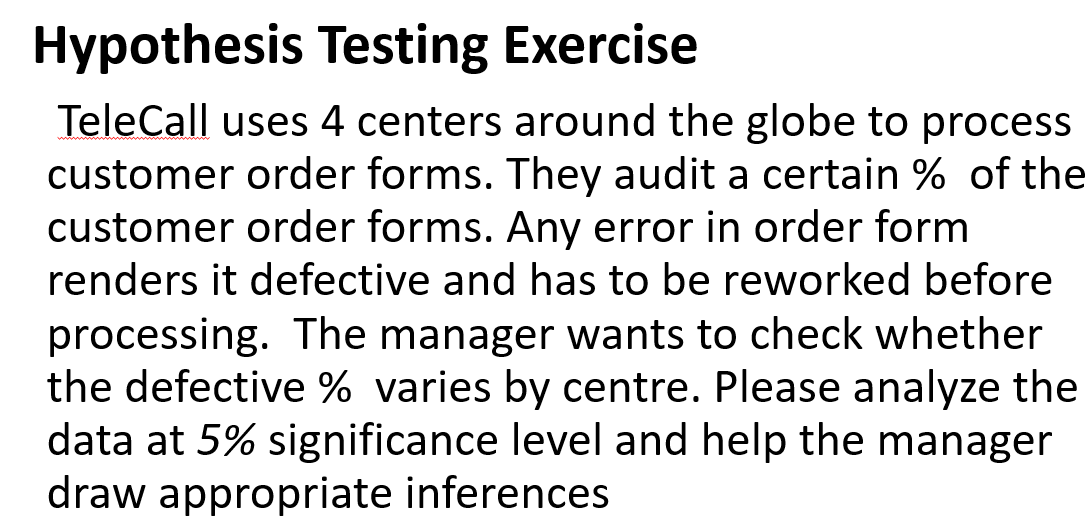

## We are going to conduct a Test of Independence using Chi-Square  test with Contingency table

# Step : 1
# formulate the hypothesis
# Ho: (Null hypothesis) : Defective percentage is same across all call centres

# Ha: (Alternate hypothesis): Defective percentage is different  at atleast one of the  call centres

In [29]:
# load the data set 'Costomer+OrderForm.csv'
df_call = pd.read_csv('Costomer+OrderForm.csv')
df_call.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [30]:
# basic info about the data set
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [31]:
# No null values

In [33]:
# Print the number of defective and error free value counts
print(df_call['Phillippines'].value_counts(),
      '\n',df_call['Indonesia'].value_counts(),
      '\n',df_call['Malta'].value_counts(),
      '\n',df_call['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [34]:
# Create a contongency table with the above values
contingency_table = [[271,267,269,280],[29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [36]:
# calculating expected values for the data 
stat, p, df, exp = chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [41]:
# define observed values and expected values of the data
observed_data = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected_data = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

#  calculate test_statistic , p_value

In [42]:
test_statistic , p_value = chisquare(observed_data, expected_data, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


### Compare p_value with '$\alpha$ '(Significane Level)

# Here significane level = 0.05

# From the above , P value is greater than significance level of 0.05 , So we dont have sufficient evidence to reject null hypothesis

# That is ,  Defective percentage is same across all call centres